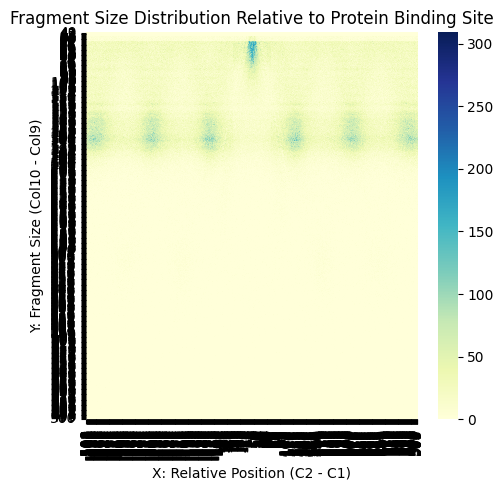

In [2]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = defaultdict(int)

with open(r'C:\Users\Lakhv\Documents\bee assignment\mapped.bed', 'r') as inputfile:
    for line in inputfile:
        col3 = int(line.split()[2])
        col4 = int(line.split()[3])
        col9 = int(line.split()[8])
        col10 = int(line.split()[9])
        
        x = int((col10 + col9 - col3 - col4)/2)
        y = col10 - col9
        data[(x,y)]+=1
        
        
# Extract all X and Y values
x_vals = sorted(set(x for x,y in data))
y_vals = sorted(set(y for x,y in data))

# Map X and Y to indices
x_to_idx = {x: i for i,x in enumerate(x_vals)}
y_to_idx = {y: i for i,y in enumerate(y_vals)}

# Create 2D matrix
matrix = np.zeros((len(y_vals), len(x_vals)))

# Fill in Z values
for (x, y), z in data.items():
    xi = x_to_idx[x]
    yi = y_to_idx[y]
    matrix[yi][xi] = z


plt.figure(figsize=(5, 5))
sns.heatmap(matrix, xticklabels=x_vals, yticklabels=y_vals, cmap="YlGnBu")
plt.xlabel('X: Relative Position (C2 - C1)')
plt.ylabel('Y: Fragment Size (Col10 - Col9)')
plt.title('Fragment Size Distribution Relative to Protein Binding Site')
plt.tight_layout()
plt.show()
